[1] - Malha fechada com PID ou [2] - Malha aberta: 
Entre com a malha de controle a ser simulada: 1
_____Eigenvalue______ Damping___ Frequency_
    0.8814   +0.3347j     0.1602      7.352
    0.8814   -0.3347j     0.1602      7.352
O percentual do Ganho K1 é de 0.09%.
O percentual do Ganho K2 é de 0.44%.
O percentual do Ganho K3 é de 0.74%.
O percentual do Ganho K4 é de 0.56%.
O percentual do Ganho K5 é de 0.26%.


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvari

O valor de ISE calculado para a malha de controle é: 112.8875
O valor de IAE calculado para a malha de controle é: 150.7264
O valor de ISU calculado para a malha de controle é: 4532.5929
O valor de TVC calculado para a malha de controle é: 7.2611


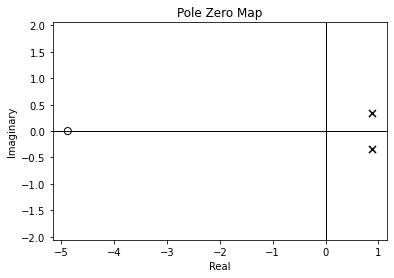

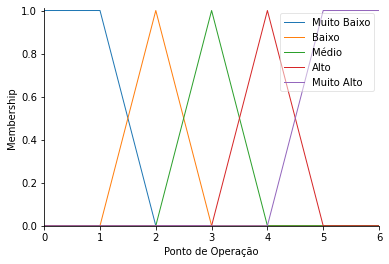

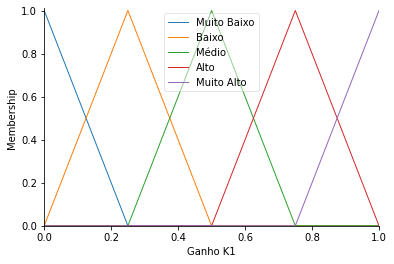

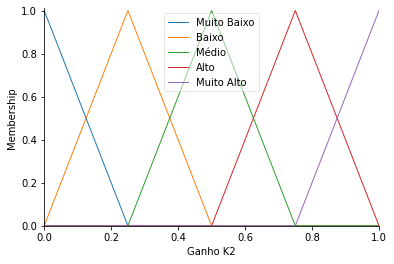

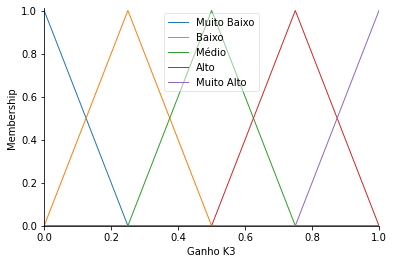

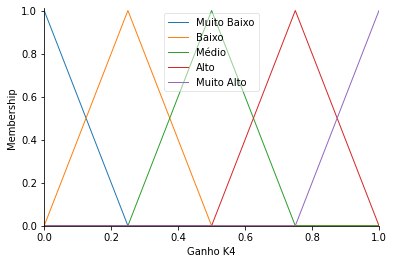

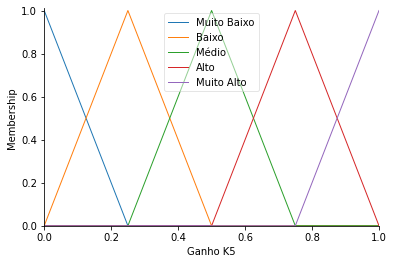

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from control.matlab import *
import skfuzzy as fuzz
from skfuzzy import control as ctl

print('[1] - Malha fechada com PID ou [2] - Malha aberta: ') # Opções de malha de controle
n = int(input('Entre com a malha de controle a ser simulada: ')) # Seleção da malha de controle

# Configuração padrão do circuito eletrônico (modelo estocástico)
Az = [1.0, -1.7628271024278894252290683652973, 0.8888827902564973015842042514123] # Polinômio A(z^-1)
Bz = [0.021018021110895027114828792491608, 0.10254201349683352006980641135669] # Polinômio B(z^-1)
Cz = [1.0, -0.015193361616161639784938763853006, -0.0046240196648598139508856696977546] # Polinômio C(z^-1)
Ts = 0.05; d = int(1.0); umax = 5.0; umin = -5.0; # Período de amostragem, delay, limites de saturação do sinal de controle

# Transformar polinômios para numpy array
Az = np.array(Az)
Bz = np.array(Bz)
Cz = np.array(Cz)

# Coeficientes do modelo
a1 = Az[1]; a2 = Az[2]
b0 = Bz[0]; b1 = Bz[1]
c1 = Cz[1]; c2 = Cz[2]

# Ordem dos polinômios A(z^-1), B(z^-1) e C(z^-1)
na = len(Az)-1; nb = len(Bz); nc = len(Cz)-1;

# Extrair informações úteis do sistema a ser controlado
Gz = tf(Bz, Az, Ts) # Função de Transferência discreta
pole(Gz) # Polos do sistema
zero(Gz) # Zeros do sistema
pzmap(Gz) # Plota o mapa de polos e zeros do sitema
wn, csi, poles = damp(Gz) # Frequência natural, coeficiente de amortecimento e polos

# Projeto do controlador PID
kp = dcgain(Gz) # Ganho estático da planta
wn = wn[0] # Frequência natural não amortecida do sistema (rad/s)
csi = csi[0] # Coeficiente de amortecimento considerado
tau_ma = 1/wn # Constante de tempo de malha aberta
# tau_mf = r*tau_ma # Constante de tempo de malha fechada
# zd = np.exp(-Ts/tau_mf) # Polo real discreto, quanto mais próximo de 1, mais conservativa será a lei de controle

# Parâmetros do PID digital calculados via cancelamento dinâmico de polos
# s0 = (1-zd)/(b0+b1); s1 = a1*s0; s2 = a2*s0
# t0 = s0; t1 = s1; t2 = s2
# Sz = [s0, s1, s2]; Tz = [t0, t1, t2]
Rz = [1, -1]

# Transformar polinômios para numpy array
# Rz = np.array(Rz)
# Sz = np.array(Sz)
# Tz = np.array(Tz)

# Polinômios S(z^-1), T(z^-1) e R(z^-1) do controlador
# Sz1 = [ 1.35888338, -2.39547645,  1.20788805]; Tz1 = Sz1 # r = tau_mf/tau_ma: 2

# Sz1 = [ 0.71064128, -1.25273771,  0.6316768 ]; Tz1 = Sz1 # r = tau_mf/tau_ma: 4
# Sz2 = [ 0.48097939, -0.84788351,  0.42753431]; Tz2 = Sz2 # r = tau_mf/tau_ma: 6
# Sz3 = [ 0.36348301, -0.6407577 ,  0.32309379]; Tz3 = Sz3 # r = tau_mf/tau_ma: 8
# Sz4 = [ 0.29211645, -0.51495079,  0.25965728]; Tz4 = Sz4 # r = tau_mf/tau_ma: 10
# Sz5 = [ 0.24417305, -0.43043487,  0.21704122]; Tz5 = Sz5 # r = tau_mf/tau_ma: 12

Sz1 = [ 0.24417305, -0.43043487,  0.21704122]; Tz1 = Sz1 # r = tau_mf/tau_ma: 12
Sz2 = [ 0.29211645, -0.51495079,  0.25965728]; Tz2 = Sz2 # r = tau_mf/tau_ma: 10
Sz3 = [ 0.24417305, -0.43043487,  0.21704122]; Tz3 = Sz3 # r = tau_mf/tau_ma: 12
Sz4 = [ 0.29211645, -0.51495079,  0.25965728]; Tz4 = Sz4 # r = tau_mf/tau_ma: 10
Sz5 = [ 0.24417305, -0.43043487,  0.21704122]; Tz5 = Sz5 # r = tau_mf/tau_ma: 12

# Ordem dos polinômios R(z^-1), S(z^-1) e T(z^-1)
nr = len(Rz)-1; ns = len(Sz1); nt = len(Tz1)

# Definir antecedentes e consequentes
PO = ctl.Antecedent(np.arange(0, 7, 1), 'Ponto de Operação')
K1 = ctl.Consequent(np.arange(0, 1.05, 0.05), 'Ganho K1')
K2 = ctl.Consequent(np.arange(0, 1.05, 0.05), 'Ganho K2')
K3 = ctl.Consequent(np.arange(0, 1.05, 0.05), 'Ganho K3')
K4 = ctl.Consequent(np.arange(0, 1.05, 0.05), 'Ganho K4')
K5 = ctl.Consequent(np.arange(0, 1.05, 0.05), 'Ganho K5')

# Funções de pertinência do ponto de operação
PO['Muito Baixo'] = fuzz.trapmf(PO.universe, [0.0, 0.0, 1.0, 2.0])
PO['Baixo'] = fuzz.trimf(PO.universe, [1.0, 2.0, 3.0])
PO['Médio'] = fuzz.trimf(PO.universe, [2.0, 3.0, 4.0])
PO['Alto'] = fuzz.trimf(PO.universe, [3.0, 4.0, 5.0])
PO['Muito Alto'] = fuzz.trapmf(PO.universe, [4.0, 5.0, 6.0, 6.0])

# Funções de pertinência para o Ganho K1
K1['Muito Baixo'] = fuzz.trimf(K1.universe, [0.0, 0.0, 0.25])
K1['Baixo'] = fuzz.trimf(K1.universe, [0.0, 0.25, 0.50])
K1['Médio'] = fuzz.trimf(K1.universe, [0.25, 0.50, 0.75])
K1['Alto'] = fuzz.trimf(K1.universe, [0.50, 0.75, 1.0])
K1['Muito Alto'] = fuzz.trimf(K1.universe, [0.75, 1.0, 1.0])

# Funções de pertinência para o Ganho K2
K2['Muito Baixo'] = fuzz.trimf(K2.universe, [0.0, 0.0, 0.25])
K2['Baixo'] = fuzz.trimf(K2.universe, [0.0, 0.25, 0.50])
K2['Médio'] = fuzz.trimf(K2.universe, [0.25, 0.50, 0.75])
K2['Alto'] = fuzz.trimf(K2.universe, [0.50, 0.75, 1.0])
K2['Muito Alto'] = fuzz.trimf(K2.universe, [0.75, 1.0, 1.0])

# Funções de pertinência para o Ganho K3
K3['Muito Baixo'] = fuzz.trimf(K3.universe, [0.0, 0.0, 0.25])
K3['Baixo'] = fuzz.trimf(K3.universe, [0.0, 0.25, 0.50])
K3['Médio'] = fuzz.trimf(K3.universe, [0.25, 0.50, 0.75])
K3['Alto'] = fuzz.trimf(K3.universe, [0.50, 0.75, 1.0])
K3['Muito Alto'] = fuzz.trimf(K3.universe, [0.75, 1.0, 1.0])

# Funções de pertinência para o Ganho K4
K4['Muito Baixo'] = fuzz.trimf(K4.universe, [0.0, 0.0, 0.25])
K4['Baixo'] = fuzz.trimf(K4.universe, [0.0, 0.25, 0.50])
K4['Médio'] = fuzz.trimf(K4.universe, [0.25, 0.50, 0.75])
K4['Alto'] = fuzz.trimf(K4.universe, [0.50, 0.75, 1.0])
K4['Muito Alto'] = fuzz.trimf(K4.universe, [0.75, 1.0, 1.0])

# Funções de pertinência para o Ganho K5
K5['Muito Baixo'] = fuzz.trimf(K5.universe, [0.0, 0.0, 0.25])
K5['Baixo'] = fuzz.trimf(K5.universe, [0.0, 0.25, 0.50])
K5['Médio'] = fuzz.trimf(K5.universe, [0.25, 0.50, 0.75])
K5['Alto'] = fuzz.trimf(K5.universe, [0.50, 0.75, 1.0])
K5['Muito Alto'] = fuzz.trimf(K5.universe, [0.75, 1.0, 1.0])

# Visualizar funções de pertinência
PO.view()
K1.view()
K2.view()
K3.view()
K4.view()
K5.view()

# Regras Fuzzy
regra01 = ctl.Rule(antecedent = (PO['Muito Baixo']),
                   consequent = (K1['Muito Alto'],
                                 K2['Médio'],
                                 K3['Muito Baixo'],
                                 K4['Muito Baixo'],
                                 K5['Muito Baixo']))

regra02 = ctl.Rule(antecedent = (PO['Baixo']),
                   consequent = (K1['Médio'],
                                 K2['Muito Alto'],
                                 K3['Muito Baixo'],
                                 K4['Muito Baixo'],
                                 K5['Muito Baixo']))

regra03 = ctl.Rule(antecedent = (PO['Médio']),
                   consequent = (K1['Muito Baixo'],
                                 K2['Médio'],
                                 K3['Muito Alto'],
                                 K4['Médio'],
                                 K5['Muito Baixo']))

regra04 = ctl.Rule(antecedent = (PO['Alto']),
                   consequent = (K1['Muito Baixo'],
                                 K2['Muito Baixo'],
                                 K3['Médio'],
                                 K4['Muito Alto'],
                                 K5['Médio']))

regra05 = ctl.Rule(antecedent = (PO['Muito Alto']),
                   consequent = (K1['Muito Baixo'],
                                 K2['Muito Baixo'],
                                 K3['Muito Baixo'],
                                 K4['Médio'],
                                 K5['Muito Alto']))


# Criar sistema de controle
base_regras = ctl.ControlSystem([regra01, regra02, regra03, regra04, regra05])
sistema_fuzzy = ctl.ControlSystemSimulation(base_regras)

# Simular o sistema fuzzy
sistema_fuzzy.input['Ponto de Operação'] = 3.2 # Sinal de referência da malha de controle
sistema_fuzzy.compute()
K1 = sistema_fuzzy.output['Ganho K1']
K2 = sistema_fuzzy.output['Ganho K2']
K3 = sistema_fuzzy.output['Ganho K3']
K4 = sistema_fuzzy.output['Ganho K4']
K5 = sistema_fuzzy.output['Ganho K5']

# Apresentar ao usuário a resposta do sistema fuzzy
print('O percentual do Ganho K1 é de {:.2f}%.'.format(K1))
print('O percentual do Ganho K2 é de {:.2f}%.'.format(K2))
print('O percentual do Ganho K3 é de {:.2f}%.'.format(K3))
print('O percentual do Ganho K4 é de {:.2f}%.'.format(K4))
print('O percentual do Ganho K5 é de {:.2f}%.'.format(K5))

# Sinal de referência
yr1 = np.zeros([1, 20], float)
yr2 = np.ones([1, 280], float)
yr3 = 3*np.ones([1, 300], float)
yr4 = 2*np.ones([1, 300], float)
yr5 = np.ones([1, 300], float)
yr = np.concatenate((yr1, yr2, yr3, yr4, yr5), axis = 1)
_, nit = yr.shape; nit = int(nit) # Número de iterações

# Perturbação na entrada da planta
v1 = np.zeros([1, 20], float)
v2 = np.zeros([1, 280], float)
v3 = np.zeros([1, 300], float)
v4 = np.zeros([1, 300], float)
v5 = np.zeros([1, 300], float)
v = np.concatenate((v1, v2, v3, v4, v5), axis = 1)

# Inicializar vetores
uv = np.zeros([1, nit], float) # Inicializar vetor de sinal interno (u+v)
yv = np.zeros([1, nit], float) # Inicializar vetor de sinal interno (y+xi)
y = np.zeros([1, nit], float) # Inicializar vetor de sinal de saída
u = np.zeros([1, nit], float) # Inicializar vetor de sinal de controle
du = np.zeros([1, nit], float) # Inicializar vetor de incremento de controle
e = np.zeros([1, nit], float) # Inicializar vetor de sinal de erro
Kfuzzy = np.zeros([5, nit], float) # Inicializar vetor com o histórico dos ganhos fuzzy

# Inicializar vetores do sinal de controle de cada controlador PID local
u1 = np.zeros([1, nit], float) # Vetor de sinal de controle PID 01
u2 = np.zeros([1, nit], float) # Vetor de sinal de controle PID 02
u3 = np.zeros([1, nit], float) # Vetor de sinal de controle PID 03
u4 = np.zeros([1, nit], float) # Vetor de sinal de controle PID 04
u5 = np.zeros([1, nit], float) # Vetor de sinal de controle PID 05

# Inicializar o vetor de tempo
t = np.arange(0,nit*Ts,Ts); t = np.array(t, ndmin=2)

# Inicializar o vetor de ruído de saída
variance = 0*1e-3; # Variância
xi = np.random.normal(0.0, np.sqrt(variance), size = (1, nit)) # xi = np.random.normal(média, desvio padrão, número de amostras)

# Condições iniciais de simulação
for k in range(na+int(d)):
    y[0, k] = 0
    u[0, k] = 0
    e[0, k] = 0
    du[0, k] = 0 

# Malha de controle
for k in range(na+int(d), nit):
    y[0, k] = np.flipud(-Az[1:3]) @ y[0, k-na:k].T +np.flipud(Bz[0:2]) @ u[0, k-na-d+1:k-d+1].T # Sinal de saída
    yv[0, k] = y[0, k] +xi[0, k] +v[0, k] # Sinal de saída medido
    e[0, k] = yr[0, k] -yv[0, k] # Sinal de erro
    
    if n == 1: # Malha fechada
        # Lei de controle de banco de controladores PID com supervisão fuzzy
        sistema_fuzzy.input['Ponto de Operação'] = yr[0, k] # Sinal de referência da malha de controle
        sistema_fuzzy.compute() # Supervisor fuzzy
        K1 = sistema_fuzzy.output['Ganho K1']
        K2 = sistema_fuzzy.output['Ganho K2']
        K3 = sistema_fuzzy.output['Ganho K3']
        K4 = sistema_fuzzy.output['Ganho K4']
        K5 = sistema_fuzzy.output['Ganho K5']
        Kfuzzy[0, k] = K1; Kfuzzy[1, k] = K2; Kfuzzy[2, k] = K3; Kfuzzy[3, k] = K4; Kfuzzy[4, k] = K5
        Knorma = K1 +K2 +K3 +K4 +K5 # Normalizar ponderações do supervisor fuzzy de 0 a 1
        u1[0, k] = u1[0, k-1] +np.flipud(Tz1[0:3]) @ yr[0, k-nt:k].T -np.flipud(Sz1[0:3]) @ yv[0, k-nt:k].T # PID 01
        u2[0, k] = u2[0, k-1] +np.flipud(Tz2[0:3]) @ yr[0, k-nt:k].T -np.flipud(Sz2[0:3]) @ yv[0, k-nt:k].T # PID 02
        u3[0, k] = u3[0, k-1] +np.flipud(Tz3[0:3]) @ yr[0, k-nt:k].T -np.flipud(Sz3[0:3]) @ yv[0, k-nt:k].T # PID 03
        u4[0, k] = u4[0, k-1] +np.flipud(Tz4[0:3]) @ yr[0, k-nt:k].T -np.flipud(Sz4[0:3]) @ yv[0, k-nt:k].T # PID 04
        u5[0, k] = u5[0, k-1] +np.flipud(Tz5[0:3]) @ yr[0, k-nt:k].T -np.flipud(Sz5[0:3]) @ yv[0, k-nt:k].T # PID 05
        u[0, k] = (1/Knorma)*(K1*u1[0, k] +K2*u2[0, k] +K3*u3[0, k] +K4*u4[0, k] +K5*u5[0, k]) # Sinal de controle
        du[0, k] = u[0, k] -u[0, k-1] # Incremento de controle

    elif n == 2: # Malha aberta
        u[0, k] = yr[0, k] # Sinal de controle
        du[0, k] = u[0, k] -u[0, k-1] # Incremento de controle
    if u[0, k] >= umax: #Saturação da lei de controle
        u[0, k] = umax;
    elif u[0, k] <= umin:
        u[0, k] = umin
        
# Índices de desempenho
ISE = np.sum(e @ e.T); # Integral Square Error
IAE = np.sum(np.absolute(e)); # Integral Absolute Error
ISU = np.sum(u @ u.T); # Integral Square of Control
TVC =  np.sum(np.absolute(du)); # Total Variation of Control

# Apresenta os valores calculados ao usuário
print('O valor de ISE calculado para a malha de controle é: {:.4f}'.format(ISE))
print('O valor de IAE calculado para a malha de controle é: {:.4f}'.format(IAE))
print('O valor de ISU calculado para a malha de controle é: {:.4f}'.format(ISU))
print('O valor de TVC calculado para a malha de controle é: {:.4f}'.format(TVC))

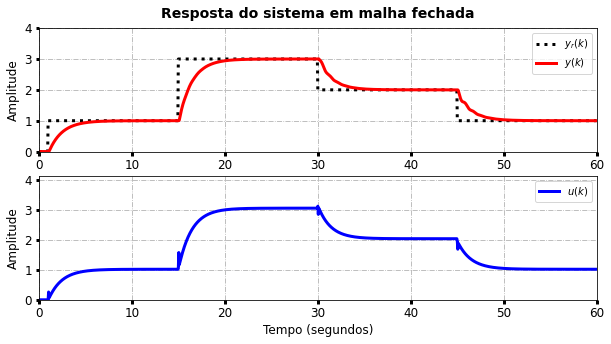

In [2]:
# Gerar gráfico e suas configurações

plt.rc(
    'axes',
    labelweight = 'normal',
    labelsize = 'large',
    titleweight = 'bold',
    titlesize = 14,
    titlepad = 10,
    labelcolor = 'k',
)

if n == 1: # Título para figura caso seja malha fechada
    titulo = 'Resposta do sistema em malha fechada'
elif n == 2: # Título para figura caso seja malha aberta
    titulo = 'Resposta em malha aberta'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 5))
ax1.plot(t.T,yr.T,':k',t.T,yv.T,'r', linewidth = 3)
ax1.axis([0, 60, 0, np.max(yv)+1])
ax1.legend(['$y_r(k)$', '$y(k)$'])
ax1.set(ylabel = 'Amplitude', title = 'Resposta do sistema em malha fechada')
ax1.grid(True, linestyle = '-.')
ax1.tick_params(labelcolor = 'k', labelsize = 'large', width = 3)

ax2.plot(t.T,u.T,'b', linewidth = 3)
plt.axis([0, 60, 0, np.max(u)+1])
ax2.legend(['$u(k)$'])
ax2.set(ylabel = 'Amplitude', xlabel = 'Tempo (segundos)')
ax2.grid(True, linestyle = '-.')
ax2.tick_params(labelcolor = 'k', labelsize = 'large', width = 3)

fig.savefig('Fuzzy_Control.png', dpi = 300)

In [3]:
dados = {'yr': list(yr.T), 'u': list(u.T), 'y': list(yv.T), 't': list(t.T)} # Salvar os sinais de interesse
fuzzy_df = pd.DataFrame(data = dados) # Criar o dataframe
fuzzy_df.to_excel('FUZZY dados.xlsx', index = False) # Salvar o dataframe em formato de arquivo Excel no computador
# fuzzy_df.to_csv('FUZZY dados.csv', index = False) # Salvar o dataframe em formato de arquivo CSV no computador